# Frequent opiate prescriber

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import preprocess as pp

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv('../data/prescriber-info.csv')

In [3]:
data.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


## Variable Separation

In [4]:
uniq_cols = ['NPI']

In [5]:
cat_cols = list(data.columns[1:5])
cat_cols

['Gender', 'State', 'Credentials', 'Specialty']

In [6]:
num_cols = list(data.columns[5:-1])
num_cols;

In [7]:
target = [data.columns[-1]]
target

['Opioid.Prescriber']

## Categorical Variable Analysis & EDA

### Missing values

In [8]:
# chcking for missing values
data[cat_cols].isnull().sum()

Gender           0
State            0
Credentials    763
Specialty        0
dtype: int64

In [9]:
# checking for missing value percentage
data[cat_cols].isnull().sum()/data.shape[0] *100

Gender         0.000
State          0.000
Credentials    3.052
Specialty      0.000
dtype: float64

In [10]:
# checking for null value in drugs column
data[num_cols].isnull().sum().sum()

0

In [11]:
data['NPI'].nunique()

25000

Remarks:

1. We dont need `NPI` column it has all unique values.
2. The `Credentials` column has missing values ~3% of total.
<!-- 3. All the `med_clos` are sparse in nature -->

### Basic plots

In [12]:
data[num_cols].iloc[:,2].value_counts()

0      23833
11       148
12       122
13       112
14        93
       ...  
53         1
356        1
147        1
99         1
79         1
Name: ACYCLOVIR, Length: 81, dtype: int64

In [13]:
cat_cols

['Gender', 'State', 'Credentials', 'Specialty']

In [14]:
for item in cat_cols[1:]:
    print('-'*25)
    print(data[item].value_counts())


-------------------------
CA    2562
NY    1956
FL    1570
TX    1500
PA    1211
IL    1002
OH     981
MI     872
NC     778
MA     725
NJ     649
GA     613
WA     578
VA     568
TN     552
IN     533
AZ     509
MD     509
WI     498
MO     483
MN     448
CO     393
SC     390
CT     388
KY     367
LA     354
AL     344
OR     344
OK     281
PR     231
IA     225
AR     216
KS     203
WV     199
MS     193
NM     166
UT     162
NV     155
ME     147
NE     137
ID     133
NH     119
RI     117
HI      91
DE      91
SD      83
DC      79
MT      77
ND      66
VT      65
AK      39
WY      38
VI       3
AE       2
GU       2
ZZ       2
AA       1
Name: State, dtype: int64
-------------------------
MD                 7034
M.D.               6772
DDS                1145
D.O.                866
PA-C                845
                   ... 
RN, FNP-BC            1
P.A.,C.               1
DNP / FNP             1
DNP, APRN, NP-C       1
DC                    1
Name: Credentials, Length: 887,

In [15]:
cat_cols

['Gender', 'State', 'Credentials', 'Specialty']

In [16]:
# Gender analysis

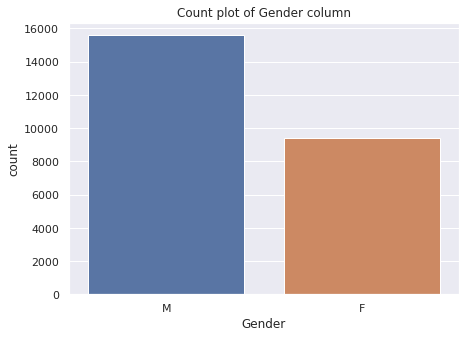

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(data=data,x='Gender')
plt.title('Count plot of Gender column')
plt.show()

In [18]:
# State column

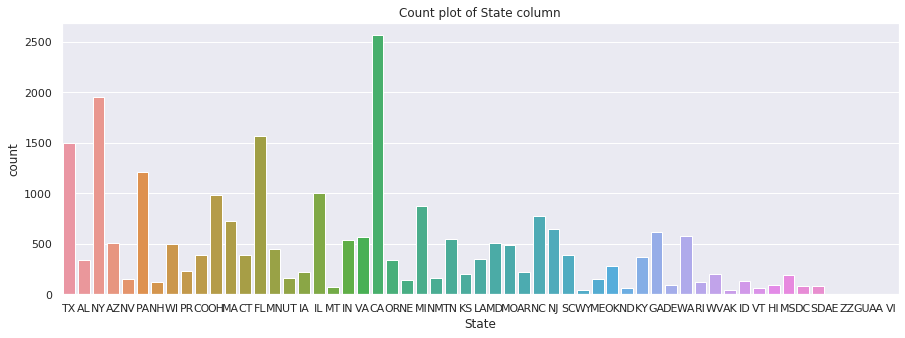

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='State')
plt.title('Count plot of State column')
plt.show()

In [20]:
# lets check out `Speciality` column

In [21]:
data['Specialty'].nunique()

109

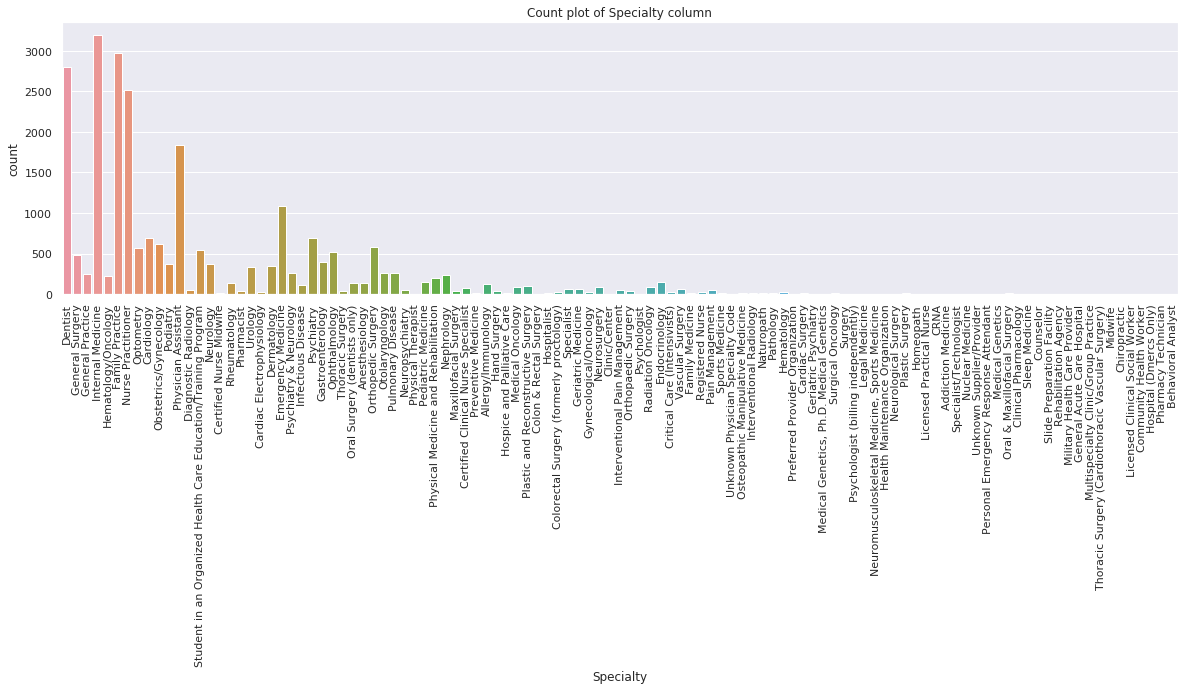

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(data=data,x='Specialty')
plt.title('Count plot of Specialty column')
plt.xticks(rotation=90)
plt.show()

In [23]:
data['Specialty'].value_counts()[:20]

Internal Medicine                                                 3194
Family Practice                                                   2975
Dentist                                                           2800
Nurse Practitioner                                                2512
Physician Assistant                                               1839
Emergency Medicine                                                1087
Psychiatry                                                         691
Cardiology                                                         688
Obstetrics/Gynecology                                              615
Orthopedic Surgery                                                 575
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     547
Ophthalmology                                                      519
General Surgery                                                    487
Gastro

In [24]:
# filling missing values with mean

In [25]:
data['Credentials'].nunique()

887

In [26]:
data['Credentials'].value_counts()[:50];

In [27]:
tpp = pp.TextPreprocess('Credentials')
tpp.fit(data)

TextPreprocess(variables=['Credentials'])

In [28]:
data['Credentials'] = tpp.transform(data)['Credentials']

In [29]:
data['Credentials'].nunique()

729

In [30]:
data['Credentials'].value_counts()[100:150];

In `credentials` we can do lot more

1. The credentals column have multiple occupation in the same row.
2. \[PHD, MD\] and \[MD, PHD\] are treated differently.
3. P,A, is treated different from P.A and PA
4. MD ----- M.D. , M.D, M D, MD\` 
5. This column is a mess

In [31]:
cat_cols

['Gender', 'State', 'Credentials', 'Specialty']

Remarks:

1. We don't need `Credentials` column which is a real mess, the `Specialty` column has the same information as of `Credentials`. 

2. Cat Features to remove - `NPI`, `Credentials`  

3. Cat Features to keep - `Gender`, `State`, `Speciality`   

4. Cat encoder pipeline - 
    1. Gender - normal 1/0 encoding using category_encoders
    2. State - Frequency encoding using category_encoders
    3. Speciality - Target encoding 

### Numerical Variable Analysis & Engineering

In [32]:
for item in num_cols:
    print('-'*25)
    print(f'frequency - {data[item].nunique()}')


-------------------------
frequency - 208
-------------------------
frequency - 123
-------------------------
frequency - 81
-------------------------
frequency - 230
-------------------------
frequency - 72
-------------------------
frequency - 268
-------------------------
frequency - 255
-------------------------
frequency - 420
-------------------------
frequency - 145
-------------------------
frequency - 148
-------------------------
frequency - 699
-------------------------
frequency - 158
-------------------------
frequency - 158
-------------------------
frequency - 106
-------------------------
frequency - 107
-------------------------
frequency - 367
-------------------------
frequency - 660
-------------------------
frequency - 130
-------------------------
frequency - 198
-------------------------
frequency - 181
-------------------------
frequency - 168
-------------------------
frequency - 186
-------------------------
frequency - 113
-------------------------
frequency 

In [33]:
print(f'Min \t Average \t Max \t Prob>0')
for item in num_cols:
    print('-'*40)
    prob = sum(data[item] > 0) / data[item].shape[0]
    print(f'{data[item].min()}\t{data[item].mean(): .4f} \t{data[item].max()} \t {prob:.4f}')

Min 	 Average 	 Max 	 Prob>0
----------------------------------------
0	 3.1572 	770 	 0.0637
----------------------------------------
0	 2.3704 	644 	 0.0853
----------------------------------------
0	 1.0537 	356 	 0.0467
----------------------------------------
0	 7.0410 	1105 	 0.1614
----------------------------------------
0	 0.7084 	275 	 0.0317
----------------------------------------
0	 8.9628 	2431 	 0.1728
----------------------------------------
0	 9.3057 	790 	 0.1818
----------------------------------------
0	 16.1281 	5716 	 0.2061
----------------------------------------
0	 2.3948 	596 	 0.0664
----------------------------------------
0	 4.3472 	430 	 0.1373
----------------------------------------
0	 44.3146 	2429 	 0.3250
----------------------------------------
0	 2.8432 	665 	 0.0798
----------------------------------------
0	 6.0060 	617 	 0.2028
----------------------------------------
0	 2.7837 	511 	 0.1116
----------------------------------------
0	 0.9858 	107

0	 45.7890 	3300 	 0.2975
----------------------------------------
0	 1.5334 	626 	 0.0512
----------------------------------------
0	 47.0497 	1926 	 0.3421
----------------------------------------
0	 8.8335 	754 	 0.1728
----------------------------------------
0	 0.9206 	444 	 0.0272
----------------------------------------
0	 11.5414 	1011 	 0.1958
----------------------------------------
0	 6.7295 	1003 	 0.1378
----------------------------------------
0	 22.1488 	2503 	 0.2572
----------------------------------------
0	 6.7808 	4194 	 0.1378
----------------------------------------
0	 1.0840 	655 	 0.0370
----------------------------------------
0	 2.6667 	3605 	 0.0323
----------------------------------------
0	 4.7552 	642 	 0.1296
----------------------------------------
0	 2.2614 	625 	 0.0781
----------------------------------------
0	 9.5904 	2066 	 0.1710
----------------------------------------
0	 28.6065 	1749 	 0.2634
----------------------------------------
0	 4.8378 	

In [34]:
print(f'Maximun of all maxs - {data[num_cols].max().max()}')
print(f'Average of all maxs - {data[num_cols].max().mean()}')
print(f'Minimun of all maxs - {data[num_cols].max().min()}')
print(f'Maximun of all mins - {data[num_cols].min().max()}')
print(f'Minimun of all mins - {data[num_cols].min().min()}')

Maximun of all maxs - 6029
Average of all maxs - 961.464
Minimun of all maxs - 92
Maximun of all mins - 0
Minimun of all mins - 0


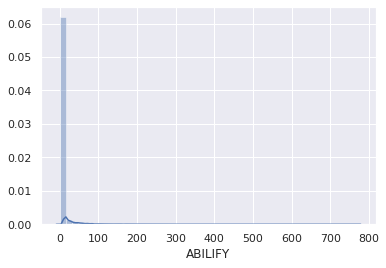

In [35]:
sns.distplot(data[num_cols[0]]);

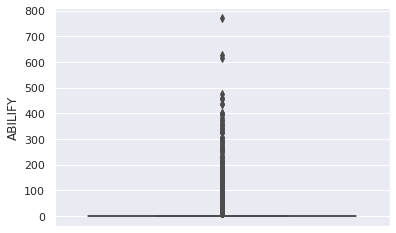

In [36]:
sns.boxplot(data = data, x = num_cols[0],orient="v");

Problem:

1. All the continuous cols have large number of zeros, and other values are counting value.
2. The solutions I stumble accross are - `Two-part-models(twopm)`, `hurdle models` and `zero inflated poisson models(ZIP)`
3. These models thinks the target variable has lots of zero and the non-zero values are not 1, if they had been 1s and 0s we could use a a classification model but they are like 0s mostly and if not zeros they are continuous variable like 100,120, 234, 898, etc.
4. In our case our feature variable has lots of zeros.

In [37]:
data[data[num_cols[0]] > 0][num_cols[0]]

36       294
39        11
74        25
82        30
107       12
        ... 
24929     20
24936     12
24957     22
24967     12
24990     31
Name: ABILIFY, Length: 1592, dtype: int64

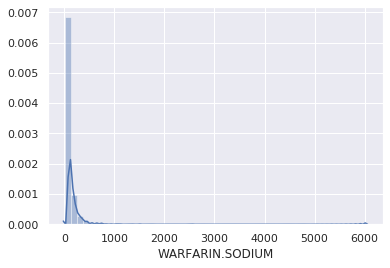

In [38]:
temp = 245
sns.distplot(data[data[num_cols[temp]] > 0][num_cols[temp]]);

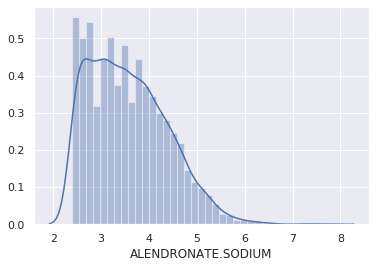

In [39]:
temp = 5
sns.distplot(np.log(data[data[num_cols[temp]] > 0][num_cols[temp]]));

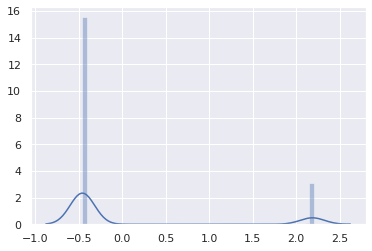

In [40]:
from sklearn.preprocessing import power_transform

temp = 5
# data_without_0 = data[data[num_cols[temp]] > 0][num_cols[temp]]
data_without_0 = data[num_cols[temp]]
data_0 = np.array(data_without_0).reshape(-1,1)
data_0_trans = power_transform(data_0, method='yeo-johnson')
sns.distplot(data_0_trans);

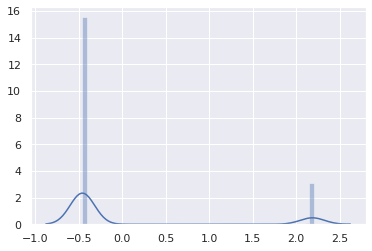

In [41]:
temp = 5
# data_without_0 = data[data[num_cols[temp]] > 0][num_cols[temp]]
data_without_0 = data[num_cols[temp]]
data_0 = np.array(data_without_0).reshape(-1,1)
data_0_trans = power_transform(data_0+1, method='box-cox')
# data_0_trans = np.log(data_0 + 1 )
# data_0
sns.distplot(data_0_trans);

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=0.8,svd_solver='full')
# pca = PCA(n_components='mle',svd_solver='full')

In [44]:
pca.fit(data[num_cols])

PCA(n_components=0.8, svd_solver='full')

In [45]:
pca_var_ratio = pca.explained_variance_ratio_
pca_var_ratio

array([0.50149694, 0.06441323, 0.04289872, 0.03310625, 0.02668311,
       0.02305797, 0.01644752, 0.01499662, 0.01458039, 0.01276859,
       0.01228911, 0.01096668, 0.01005384, 0.00937579, 0.00868693])

In [46]:
len(pca_var_ratio)

15

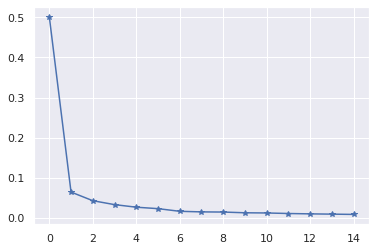

In [47]:
plt.plot(pca_var_ratio[:],'-*');

In [48]:
sum(pca_var_ratio[:10])

0.7504493498688127

### Train test split and data saving

In [49]:
# train test split
from sklearn.model_selection import train_test_split

In [52]:
X = data.drop(target,axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

In [61]:
pd.concat([X_train,y_train],axis=1).to_csv('../data/train.csv')
pd.concat([X_test,y_test],axis=1).to_csv('../data/test.csv')